<a href="https://colab.research.google.com/github/yamini749/Facial-Emotion-Detection/blob/main/Facial_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/fer2013.csv')

In [ ]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
len(df.iloc[0]['pixels'].split())


2304

In [ ]:
label_map = ['Anger', 'Neutral', 'Fear', 'Happy', 'Sad', 'Surprise']

In [ ]:
img = df.iloc[0]['pixels'].split()

In [ ]:
img = [int(i) for i in img]

In [ ]:
type(img[0])

int

In [ ]:
len(img)

2304

In [ ]:
img = np.array(img)

In [ ]:
img = img.reshape(48,48)

In [ ]:
img.shape

(48, 48)

In [ ]:
plt.imshow(img, cmap='gray')
plt.xlabel(df.iloc[0]['emotion'])

In [ ]:
X = []
y = []

In [ ]:
def getData(path):
    anger = 0
    fear = 0
    sad = 0
    happy = 0
    surprise = 0
    neutral = 0
    df = pd.read_csv(path)

    X = []
    y = []

    for i in range(len(df)):
        if df.iloc[i]['emotion'] != 1:
            if df.iloc[i]['emotion'] == 0:
                if anger <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    anger += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 2:
                if fear <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    fear += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 3:
                if happy <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    happy += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 4:
                if sad <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    sad += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 5:
                if surprise <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    surprise += 1
                else:
                    pass

            if df.iloc[i]['emotion'] == 6:
                if neutral <= 4000:
                    y.append(df.iloc[i]['emotion'])
                    im = df.iloc[i]['pixels']
                    im = [int(x) for x in im.split()]
                    X.append(im)
                    neutral += 1
                else:
                    pass



    return X, y


In [ ]:
X, y = getData('/content/fer2013.csv')

In [ ]:
np.unique(y, return_counts=True)

(array([0, 2, 3, 4, 5, 6]), array([2816, 2932, 4001, 3376, 2147, 3482]))

In [ ]:
X = np.array(X) / 255.0
y = np.array(y)

In [ ]:
X.shape, y.shape

((18754, 2304), (18754,))

In [ ]:
y_o = []
for i in y:
    if i != 6:
        y_o.append(i)

    else:
        y_o.append(1)

In [ ]:
np.unique(y_o, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([2816, 3482, 2932, 4001, 3376, 2147]))

IndexError: index 23974 is out of bounds for axis 0 with size 18754

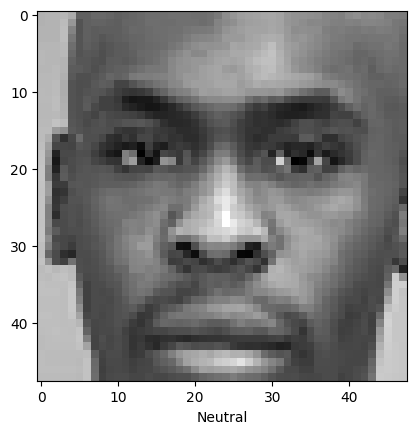

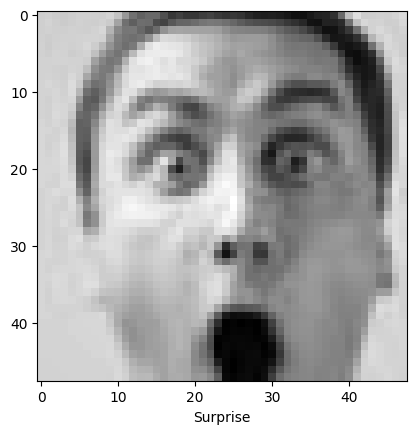

<Figure size 640x480 with 0 Axes>

In [ ]:
for i in range(5):
    r = np.random.randint(0, len(X), 1)[0] # generate a random number within the valid index range of X
    plt.figure()
    plt.imshow(X[r].reshape(48,48), cmap='gray')
    plt.xlabel(label_map[y_o[r]])

In [ ]:
X = X.reshape(len(X), 48, 48, 1)

In [ ]:
X.shape

(24006, 48, 48, 1)

In [ ]:
from keras.utils import to_categorical
y_new = to_categorical(y_o, num_classes=6)

In [ ]:
len(y_o), y_new.shape

(24006, (24006, 6))

In [ ]:
y_o[150], y_new[150]

(0, array([1., 0., 0., 0., 0., 0.]))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense , Activation , Dropout ,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from keras.layers import BatchNormalization

In [ ]:
model = Sequential()


input_shape = (48,48,1)


model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
model.add(Conv2D(64, (5, 5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

## (15, 15) --->  30
model.add(Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X, y_new, epochs=22, batch_size=64, shuffle=True, validation_split=0.2)

Epoch 1/22
235/235 ━━━━━━━━━━━━━━━━━━━━ 1038s 4s/step - accuracy: 0.2303 - loss: 2.7684 - val_accuracy: 0.1602 - val_loss: 1.9791
Epoch 2/22
235/235 ━━━━━━━━━━━━━━━━━━━━ 1016s 4s/step - accuracy: 0.2880 - loss: 1.9574 - val_accuracy: 0.2511 - val_loss: 1.6730
Epoch 3/22
235/235 ━━━━━━━━━━━━━━━━━━━━ 1010s 4s/step - accuracy: 0.3660 - loss: 1.6255 - val_accuracy: 0.2991 - val_loss: 1.7686
Epoch 4/22
125/235 ━━━━━━━━━━━━━━━━━━━━ 7:24 4s/step - accuracy: 0.4126 - loss: 1.5232

In [ ]:
model.save('model.h5')

In [ ]:
import cv2
import os
if not os.path.exists('/content/emotion.jpg'):
  print("Error: Image file not found.")
else:
  test_img = cv2.imread('/content/emotion.jpg', 0)
  if test_img is None:
    print("Error: Could not load image.")
  else:
    test_img.shape

In [ ]:
test_img.shape

(271, 267)

In [ ]:
test_img = cv2.resize(test_img, (48,48))
test_img.shape

(48, 48)

In [ ]:
test_img = test_img.reshape(1,48,48,1)

In [ ]:
model.predict(test_img)

NameError: name 'model' is not defined

In [ ]:


loss, accuracy = model.evaluate(X, y_new)
print('Accuracy: {}'.format(accuracy))
